In [138]:
import pandas as pd
import numpy as np

In [139]:
df=pd.read_csv(r'F:\Paython\python_class_practice\Social_Network_Ads.csv')

In [140]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [141]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [143]:
df.describe(include='object')

,Gender
count,400
unique,2
top,Female
freq,204


In [144]:
df=df.drop(['User ID'],axis=1)
df

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [145]:
df['Gender']=pd.get_dummies(df['Gender'],drop_first=True)
df_dummies

,Male
0,1
1,1
2,0
3,0
4,1
...,...
395,0
396,1
397,0
398,1


In [147]:
df

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0
...,...,...,...,...
395,0,46,41000,1
396,1,51,23000,1
397,0,50,20000,1
398,1,36,33000,0


In [155]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(df.drop(['Purchased'],axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [156]:
scaler_features=scaler.transform(df.drop(['Purchased'],axis=1))

In [157]:
df_scaler=pd.DataFrame(scaler_features,columns=df.columns[:-1])
df_scaler.head()

,Gender,Age,EstimatedSalary
0,1.020204,-1.781797,-1.490046
1,1.020204,-0.253587,-1.460681
2,-0.980196,-1.113206,-0.785290
3,-0.980196,-1.017692,-0.374182
4,1.020204,-1.781797,0.183751


C:\Users\Ganesh\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Ganesh\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


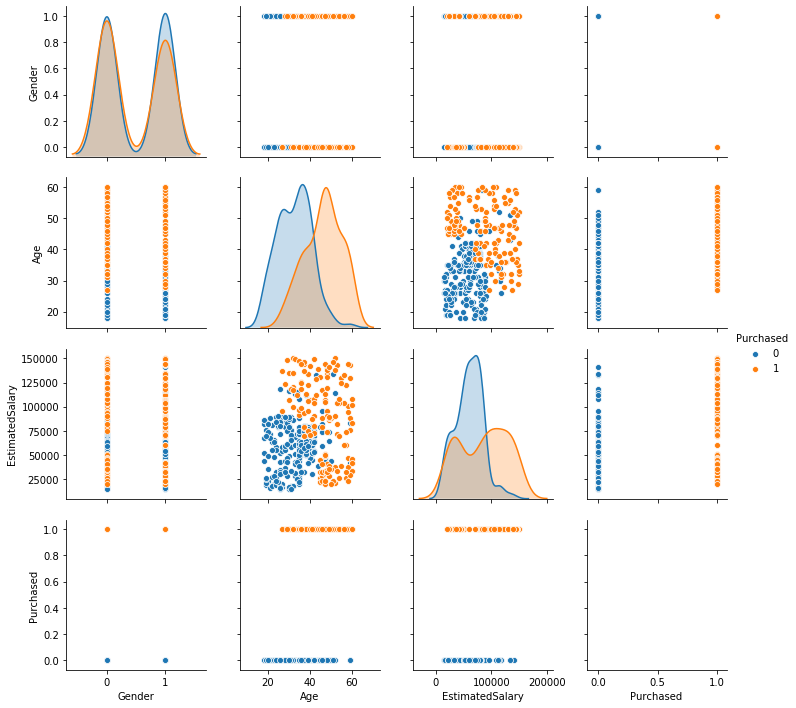

In [158]:
#Pair plot
import seaborn as sns
sns.pairplot(df,hue='Purchased')


In [168]:
#train Test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(scaler_features,df['Purchased'],test_size=0.20)

In [169]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1)

In [170]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [171]:
pred=knn.predict(X_test)

In [172]:
#Evaluation 
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score


In [173]:
print(confusion_matrix(y_test,pred))

[[37  9]
 [ 3 31]]


In [174]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.93      0.80      0.86        46
           1       0.78      0.91      0.84        34

    accuracy                           0.85        80
   macro avg       0.85      0.86      0.85        80
weighted avg       0.86      0.85      0.85        80



In [175]:
#choosing a K Values
accuracy_rate=[]
for i in range(1,40):
        
    knn=KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,df,df['Purchased'],cv=10)
    accuracy_rate.append(score.mean())

In [176]:
error_rate=[]

for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,df,df['Purchased'],cv=10)
    error_rate.append(1-score.mean())

Text(0, 0.5, 'Error Rate')

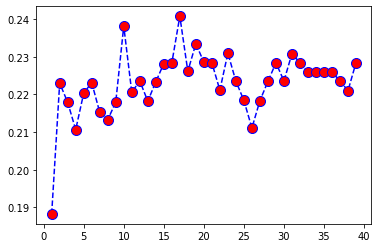

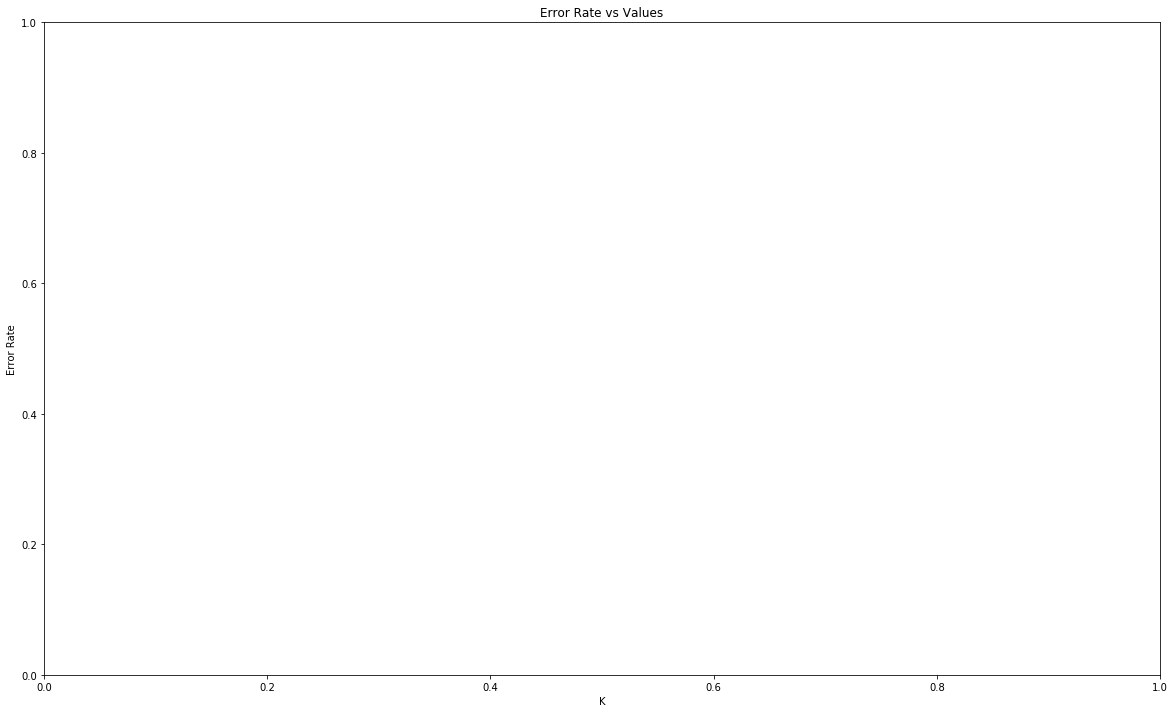

In [183]:
import matplotlib.pyplot as plt
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.figure(figsize=(20,12))
plt.title("Error Rate vs Values")
plt.xlabel('K')
plt.ylabel('Error Rate')




Text(0, 0.5, 'Error Rate')

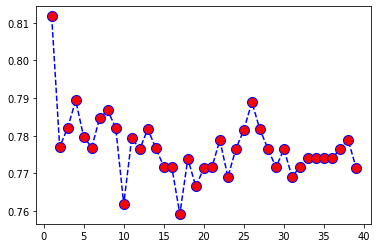

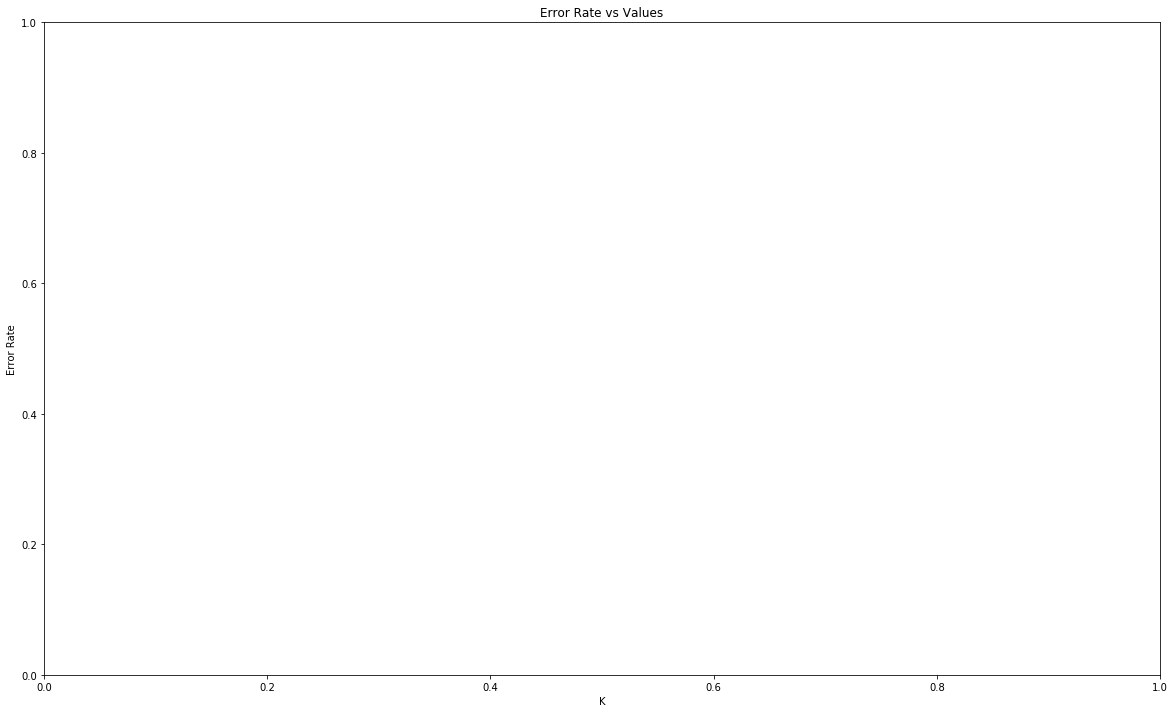

In [185]:
import matplotlib.pyplot as plt
plt.plot(range(1,40),accuracy_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.figure(figsize=(20,12))
plt.title("Accurate Rate vs Values")
plt.xlabel('K')
plt.ylabel('Error Rate')

In [188]:
#comparision the 
knn=KNeighborsClassifier(n_neighbors=23)

In [189]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=23, p=2,
                     weights='uniform')

In [190]:
pred=knn.predict(X_test)

In [191]:
print(confusion_matrix(y_test,pred))

[[40  6]
 [ 5 29]]


In [192]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88        46
           1       0.83      0.85      0.84        34

    accuracy                           0.86        80
   macro avg       0.86      0.86      0.86        80
weighted avg       0.86      0.86      0.86        80

